<div style="padding: 20px; border-radius: 10px; border: 2px solid #3A506B; background-color: #F1F6F9; color: #1C2541;">
    <h1 style="font-family: Arial, sans-serif; color: #3A506B; font-size: 2.5em; text-align: center; line-height: 1.2;">
        <span style="font-weight: bold;">Intro to Deep Learning</span>
    </h1>
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        2024-2025
    </h2>
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        Course ID: 05714182
    </h2>
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        ----------------------------------
    </h2>
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        Yahlly Schein
    </h2>
</div>


<div style="padding: 20px; border-radius: 10px; border: 2px solid #3A506B; background-color: #FF8C00; color: #1C2541;">
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        HW 1
    </h2>
</div>

# Classification and Regression with a Neural Network in Pytorch

Welcome to your first programming assignment! 
In this assignment you will build your first classification and regression neural networks.
This assignment is a 'step-through' guide to implement a simple fully-connected neural network in Pytorch.

* In the first part of this exercise, you will implement a neural network with a 2 dimensional input. Your dataset is based on a two circles-shaped groups for classification.

* Then, in the second part of this exercise, you will implement a regression model for predicting the output of a two dimensional function.

# Packages
Let's first import all the packages that you will need during this part of assignment.

## Feel free to use another libraries if you want to.

In [129]:
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader


# Dataset

In [130]:
random_num = 0
np.random.seed(random_num)
torch.manual_seed(random_num)
x, y = make_circles(500, noise=0.075)

In [131]:
# Split into train + validation and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.3, random_state=random_num)

# Further split train + validation into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=random_num)

## Visualize the dataset using matplotlib:

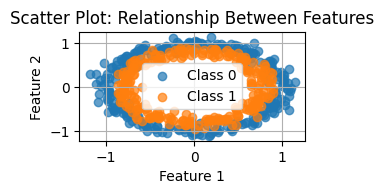

In [132]:
# 1. Scatter Plot
plt.subplot(3, 2, 1)
plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Class 0", alpha=0.7)
plt.scatter(x[y == 1, 0], x[y == 1, 1], label="Class 1", alpha=0.7)
plt.title("Scatter Plot: Relationship Between Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

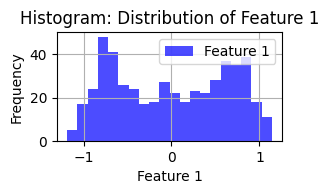

In [133]:
# 2. Histogram:
plt.subplot(3, 2, 2)
plt.hist(x[:, 0], bins=20, alpha=0.7, color="blue", label="Feature 1")
plt.title("Histogram: Distribution of Feature 1")
plt.xlabel("Feature 1")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

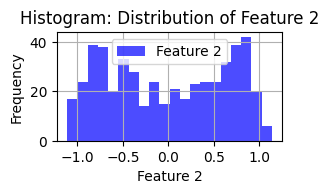

In [134]:
# 2. Histogram:
plt.subplot(3, 2, 2)
plt.hist(x[:, 1], bins=20, alpha=0.7, color="blue", label="Feature 2")
plt.title("Histogram: Distribution of Feature 2")
plt.xlabel("Feature 2")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

C:\Users\yuval\AppData\Local\Temp\ipykernel_14652\321431287.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x[:, 0], x[:, 1]], labels=["Feature 1", "Feature 2"])


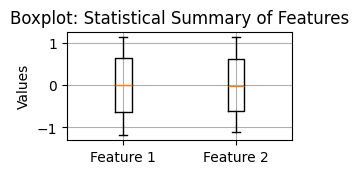

In [135]:
# 3. Boxplot: 
plt.subplot(3, 2, 3)
plt.boxplot([x[:, 0], x[:, 1]], labels=["Feature 1", "Feature 2"])
plt.title("Boxplot: Statistical Summary of Features")
plt.ylabel("Values")
plt.grid(True)

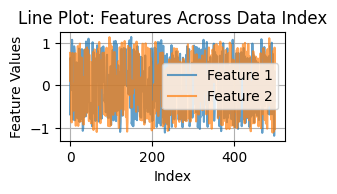

In [136]:
# 4. Line Plot:
plt.subplot(3, 2, 4)
plt.plot(range(len(x)), x[:, 0], label="Feature 1", alpha=0.7)
plt.plot(range(len(x)), x[:, 1], label="Feature 2", alpha=0.7)
plt.title("Line Plot: Features Across Data Index")
plt.xlabel("Index")
plt.ylabel("Feature Values")
plt.legend()
plt.grid(True)

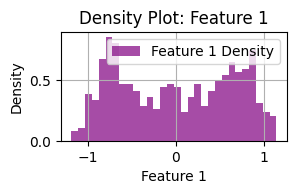

In [137]:
# 5. Density Plot (approximation using histogram): 
plt.subplot(3, 2, 5)
plt.hist(x[:, 0], bins=30, density=True, alpha=0.7, color="purple", label="Feature 1 Density")
plt.title("Density Plot: Feature 1")
plt.xlabel("Feature 1")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

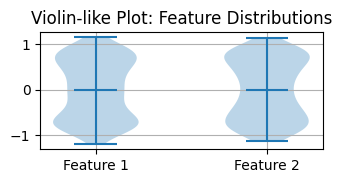

In [138]:
# 6. Violin-like Plot:
plt.subplot(3, 2, 6)
plt.violinplot([x[:, 0], x[:, 1]], showmeans=True)
plt.title("Violin-like Plot: Feature Distributions")
plt.xticks([1, 2], ["Feature 1", "Feature 2"])
plt.grid(True)

plt.tight_layout()
plt.show()

### Insights from Visualizations

### **1. Scatter Plot**
- The data has a clear circular structure with two circles (an inner and an outer one).
- This indicates a good separation between the two classes (`Class 0` and `Class 1`).
- The problem appears to be non-linear, requiring a non-linear model for proper classification.

---

### **2. Histogram**
- The distribution of `Feature 1` is not uniform, showing higher values near the center (`0`) and lower values at the edges.
- The noise in the data introduces some variability, but the distribution is still fairly symmetric around 0.

---

### **3. Boxplot**
- Both features (`Feature 1` and `Feature 2`) have similar ranges, with medians close to 0.
- No clear outliers are observed, suggesting the data is relatively clean.

---

### **4. Line Plot**
- Comparing the values of `Feature 1` and `Feature 2` across all samples reveals inherent noise in the data but no clear trend over the samples.

---

### **5. Density Plot**
- The density of `Feature 1` shows a symmetric distribution with two peaks, corresponding to the circular structure of the data (two circles = two classes).

---

### **6. Violin-like Plot**
- The distributions of `Feature 1` and `Feature 2` are similar, with significant variability within the groups. The noise impacts the shape of the distributions.


# Simple Logistic Regression

1. Implement a 2-class classification neural network with a zero hidden layer.
2. Plot loss vs epoch.
3. Plot AUC vs epoch for train and test sets. 
4. Plot ROC curve and calculate AUC for the test set.
5. Plot the learned decision boundary.
6. Briefly interpret graph's results.   

How you will do it:

* Prepare the Data.
* Define the Model.
* Train the Model.
* Evaluate the Model.
* Visualization.

**Prepare Data**

In [139]:
# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_val, dtype=torch.float32).view(-1, 1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create TensorDatasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# data loader
# Training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Testing
test_loader = DataLoader(test_dataset, batch_size=min(len(test_dataset), 256), shuffle=False)

**Define the Model:**

In [140]:
# Step 1: Define a simple neural network class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define layers
        self.layer1 = nn.Linear(in_features=2, out_features=1)  
    
    def forward(self, x):
        return torch.sigmoid(self.layer1(x)) 

In [141]:
# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

**Training and validation:**

In [142]:
# Train the model
epochs = 100
train_loss = []
test_loss = []
train_auc = []
test_auc = []

In [143]:
for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0
    y_train_all = []
    y_train_pred_all = []

    # Training phase
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch)  # Predictions already have shape [batch_size, 1]
        loss = criterion(y_pred, y_batch)  # Ensure target matches prediction shape
        loss.backward()
        optimizer.step()

        # Track training loss
        epoch_train_loss += loss.item() * x_batch.size(0)

        # Store true and predicted labels for AUC calculation
        y_train_all.append(y_batch.numpy())
        y_train_pred_all.append(y_pred.detach().numpy().squeeze())  # Squeeze only for AUC calculation

    train_loss.append(epoch_train_loss / len(train_loader.dataset))
    train_auc.append(roc_auc_score(np.concatenate(y_train_all), np.concatenate(y_train_pred_all)))

    # Validation phase
    model.eval()
    epoch_test_loss = 0
    y_test_all = []
    y_test_pred_all = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)  # Predictions already have shape [batch_size, 1]
            loss = criterion(y_pred, y_batch)  # Ensure target matches prediction shape

            # Track validation loss
            epoch_test_loss += loss.item() * x_batch.size(0)

            # Store true and predicted labels for AUC calculation
            y_test_all.append(y_batch.numpy())
            y_test_pred_all.append(y_pred.numpy().squeeze())  # Squeeze only for AUC calculation

    test_loss.append(epoch_test_loss / len(test_loader.dataset))
    test_auc.append(roc_auc_score(np.concatenate(y_test_all), np.concatenate(y_test_pred_all)))

    # Logging every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}]")
        print(f"Train Loss: {train_loss[-1]:.4f}, Train AUC: {train_auc[-1]:.4f}")
        print(f"Test Loss: {test_loss[-1]:.4f}, Test AUC: {test_auc[-1]:.4f}")


Epoch [10/100]
Train Loss: 0.6930, Train AUC: 0.5018
Test Loss: 0.7051, Test AUC: 0.4944
Epoch [20/100]
Train Loss: 0.6926, Train AUC: 0.5036
Test Loss: 0.7026, Test AUC: 0.4977
Epoch [30/100]
Train Loss: 0.6921, Train AUC: 0.5013
Test Loss: 0.7018, Test AUC: 0.5047
Epoch [40/100]
Train Loss: 0.6922, Train AUC: 0.4944
Test Loss: 0.7020, Test AUC: 0.5056
Epoch [50/100]
Train Loss: 0.6921, Train AUC: 0.4986
Test Loss: 0.7021, Test AUC: 0.5056
Epoch [60/100]
Train Loss: 0.6919, Train AUC: 0.4982
Test Loss: 0.7014, Test AUC: 0.5056
Epoch [70/100]
Train Loss: 0.6920, Train AUC: 0.4971
Test Loss: 0.7016, Test AUC: 0.5060
Epoch [80/100]
Train Loss: 0.6921, Train AUC: 0.4959
Test Loss: 0.7014, Test AUC: 0.5076
Epoch [90/100]
Train Loss: 0.6920, Train AUC: 0.5025
Test Loss: 0.7017, Test AUC: 0.5056
Epoch [100/100]
Train Loss: 0.6920, Train AUC: 0.5017
Test Loss: 0.7022, Test AUC: 0.5051


**Visualizing the plots**:

C:\Users\yuval\AppData\Local\Temp\ipykernel_14652\4065222408.py:48: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[3].scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor='k', cmap='bwr', marker='x', label='Test Points')


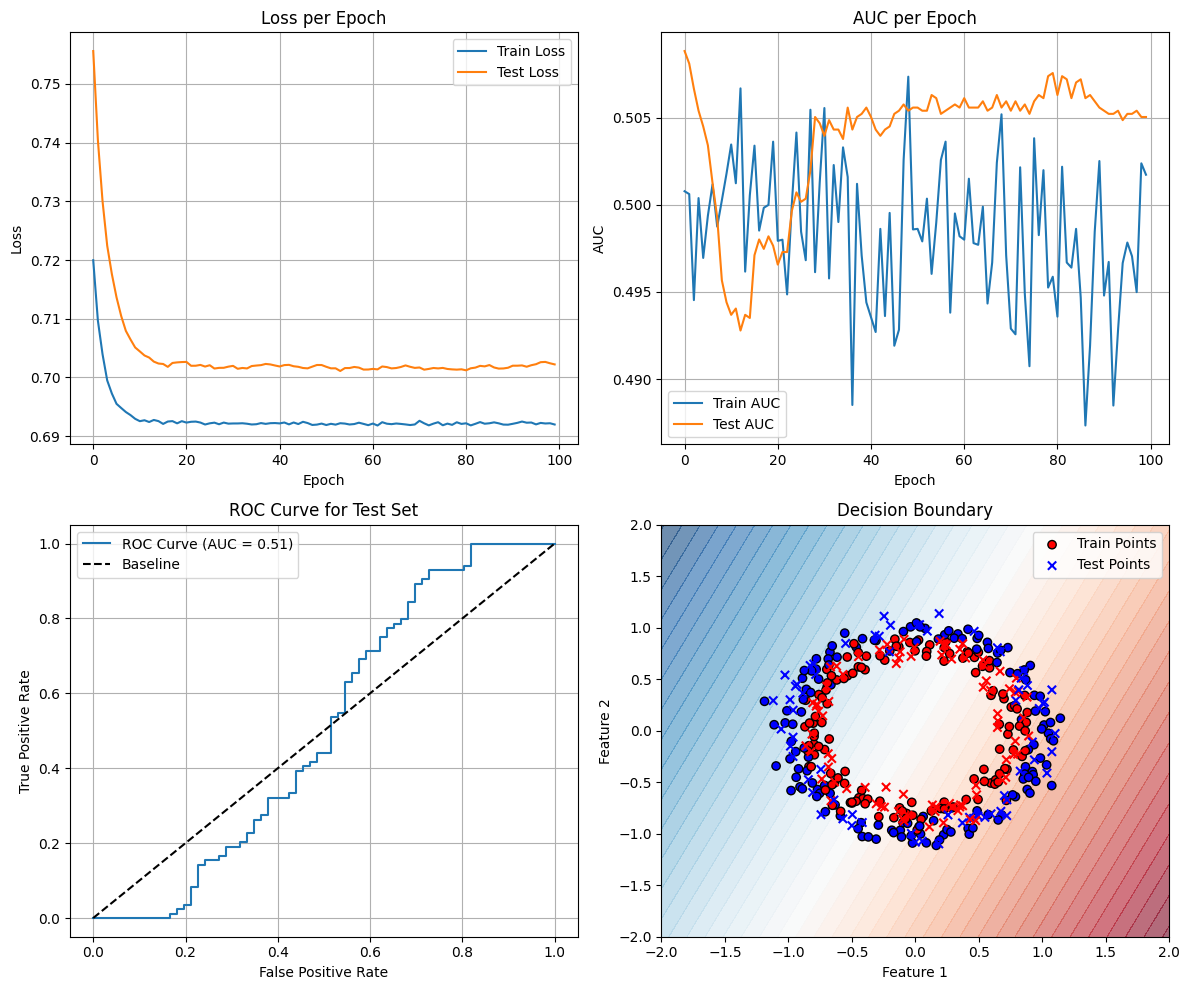

In [144]:
# Create a 2x2 grid for the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Adjust figsize as needed

# Flatten the axs array to ensure it's a 1D list
axs = axs.flatten()

# Plot Loss per Epoch
axs[0].plot(range(epochs), train_loss, label='Train Loss')
axs[0].plot(range(epochs), test_loss, label='Test Loss')
axs[0].set_title('Loss per Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid()

# Plot AUC per Epoch
axs[1].plot(range(epochs), train_auc, label='Train AUC')
axs[1].plot(range(epochs), test_auc, label='Test AUC')
axs[1].set_title('AUC per Epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('AUC')
axs[1].legend()
axs[1].grid()

# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(np.concatenate(y_test_all), np.concatenate(y_test_pred_all))
roc_auc = auc(fpr, tpr)
axs[2].plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
axs[2].plot([0, 1], [0, 1], 'k--', label="Baseline")
axs[2].set_title('ROC Curve for Test Set')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend()
axs[2].grid()

# Plot Decision Boundary
import numpy as np

xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
with torch.no_grad():
    grid_preds = model(torch.tensor(grid_points, dtype=torch.float32)).numpy().reshape(xx.shape)

axs[3].contourf(xx, yy, grid_preds, levels=50, cmap='RdBu', alpha=0.6)
axs[3].scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k', cmap='bwr', label='Train Points')
axs[3].scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor='k', cmap='bwr', marker='x', label='Test Points')
axs[3].set_title('Decision Boundary')
axs[3].set_xlabel('Feature 1')
axs[3].set_ylabel('Feature 2')
axs[3].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


7. Is the decision boundary linear or nonlinear in the case of a logistic regression? Explain.

The decision boundary in logistic regression is **linear**.
- Logistic regression uses a **linear equation** to determine the boundary:

  \[
  w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0
  \]
- The sigmoid function maps the linear equation to probabilities but does not make the boundary nonlinear.


# Classification with Neural Networks

After you implemented "classical" logistic regression, now you will be implementing a neural network with one or more hidden layers.
You will need to choose the number of hidden layers and nodes in a feedforward neural network, activation function, the type of optimizer and its hyperparmeters which will give you the best result. Remember, we don't want to overfit the training data, we want to generalize the solution for new data not seen during training. 

Plot the same graphs as in the previous sections and explain the similarities and differences. 

**Define the Model:**

In [145]:
### START CODE HERE ###


**Training and validation:**

In [146]:
### START CODE HERE ###


**Visualizing the plots:**

In [147]:
### START CODE HERE ###


8. Why does a neural network need a non-linear activation function? try to figure out what heppan when you remove the activation function and explain the results.

# Regression with Neural Networks

In this part of the excercise you will need to implement a regression model using neural networks. The model should predict the output of a trigonometric function of two variables. Your data set is based on a meshgrid. Your task is to create a list of points that would correspond to a grid and use it for the input of your neural network. Then, build your neural networks and find the architecture which gives you the best results.
1. Plot the surface from the overall data and compare it to your predicted test sets.
2. Which loss function and validation metric did you choose?
3. Plot the loss and validation metrics vs epoch for the training and test sets.
4. Build a new neural network and try overfitting your training set. Show the overfitting by using learning curve plots. 
    **Note**: You can use plt.ylim() function to better focus on the changes in the trends.

# Packages 

First import all the packages that you will need during this part of assignment.

## Feel free to use another libraries if you want to.

In [148]:
import numpy as np
import torch
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import cm

**Generate data:**

In [149]:
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

**Define the Model:**

In [150]:
### START CODE HERE ###


**Training and validation:**

In [151]:
### START CODE HERE ###


**Visualizing the plots:**

In [152]:
### START CODE HERE ###


### Build a new neural network and try overfitting your training set

**Generate data:**

In [153]:
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

**Define the Model:**

In [154]:
### START CODE HERE ###


**Training and validation:**

In [155]:
### START CODE HERE ###


**Visualizing the plots:**

In [156]:
### START CODE HERE ###


5. Briefly explain graph's results.

In [157]:
## Answer here ##

6. How does your metric value differs between the training data and the test data and why?


In [158]:
## Answer here ##

7. Mention 5 concepts/function/blocks of code from exercises 1 or 2 that you used while solving the assignment.

In [159]:
## Answer here ##

8. Mention 3 things that a LLM (GPT, Claude...) helped you with:

In [160]:
## Answer here ##

9. Describe the biggest challenge you faced while working on this assignment.

In [161]:
## Answer here ##